In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2012-01-01'
end = '2024-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.532528,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.603836,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.373516,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.150156,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.465409,233776981
...,...,...,...,...,...,...
2024-11-29,170.059998,170.869995,168.750000,170.490005,170.490005,9250700
2024-12-02,170.320007,173.600006,170.270004,172.979996,172.979996,16593400
2024-12-03,173.119995,174.320007,172.509995,173.020004,173.020004,15721500


In [6]:
data.reset_index(inplace=True)

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.532528,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.603836,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.373516,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.150156,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.465409,233776981
...,...,...,...,...,...,...,...
3248,2024-11-29,170.059998,170.869995,168.750000,170.490005,170.490005,9250700
3249,2024-12-02,170.320007,173.600006,170.270004,172.979996,172.979996,16593400
3250,2024-12-03,173.119995,174.320007,172.509995,173.020004,173.020004,15721500
3251,2024-12-04,172.779999,176.429993,172.750000,176.089996,176.089996,18230000


In [8]:
ma_100_days = data.Close.rolling(100).mean()

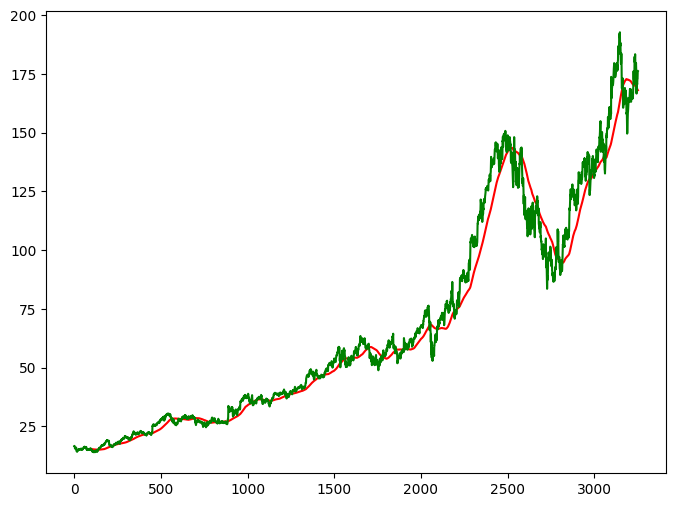

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
ma_200_days = data.Close.rolling(200).mean()

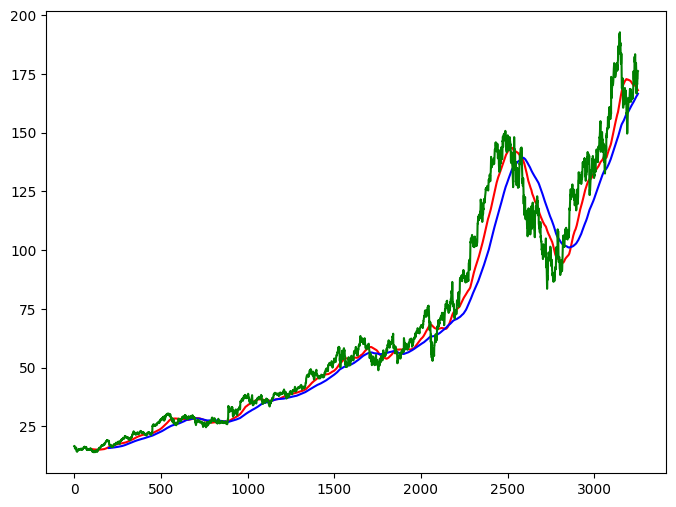

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [12]:
data.dropna(inplace=True)

In [13]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [14]:
data_train.shape[0]

2602

In [15]:
data_test.shape[0]

651

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale = scaler.fit_transform(data_train)

In [18]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [19]:
x, y = np.array(x), np.array(y)

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\shrey\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - loss: 0.0596
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0068
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0058
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 0.0046
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 0.0046
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 0.0040
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0044
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - loss: 0.0045
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 0.0038
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 0.0036
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 0.0034
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 0.0038
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0032
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0037
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - l

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [25]:
pas_100_days = data_train.tail(100)

In [26]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [28]:
data_test

,Close
0,148.675003
1,146.704498
2,144.970505
3,147.368500
4,144.838501
...,...
746,170.490005
747,172.979996
748,173.020004
749,176.089996


In [29]:
data_test_scale  =  scaler.fit_transform(data_test)

In [30]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [31]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [32]:
scale =1/scaler.scale_

In [33]:
y_predict = y_predict*scale

In [34]:
y = y*scale

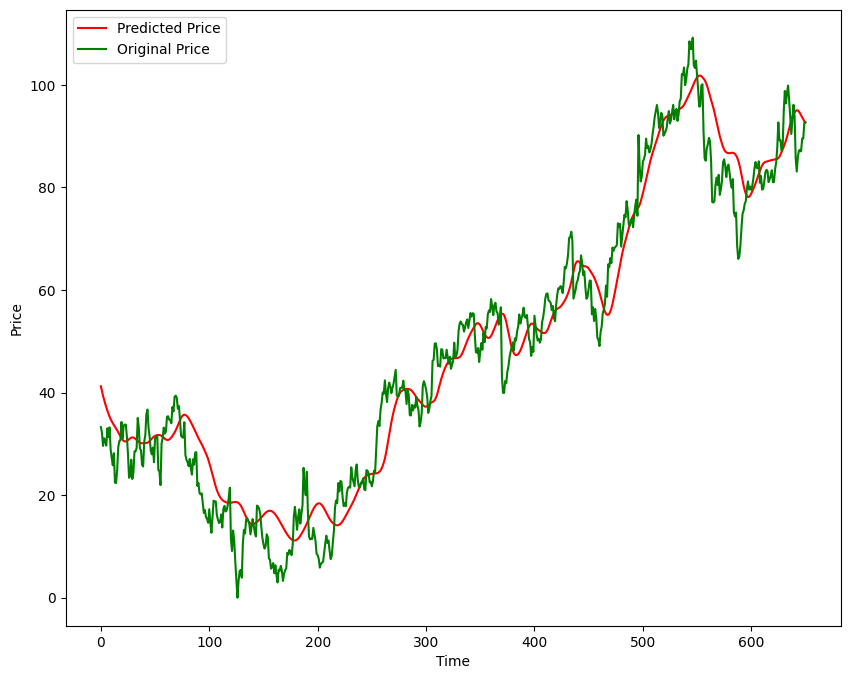

In [35]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
model.save('Stock Predictions Model.keras')